In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB, GaussianNB, CategoricalNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('SalaryData_Train.csv')
test_data = pd.read_csv('SalaryData_Test.csv')

In [3]:
df = pd.concat([train_data, test_data], ignore_index=True)

In [4]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
df.shape

(45221, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [7]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
#duplicated
df[df.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
45210,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
45213,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
45214,25,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K


In [10]:
df.drop_duplicates(inplace=True)

print(f"Number of rows after dropping duplicates: {len(df)}")


Number of rows after dropping duplicates: 39239


In [11]:
df[df.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


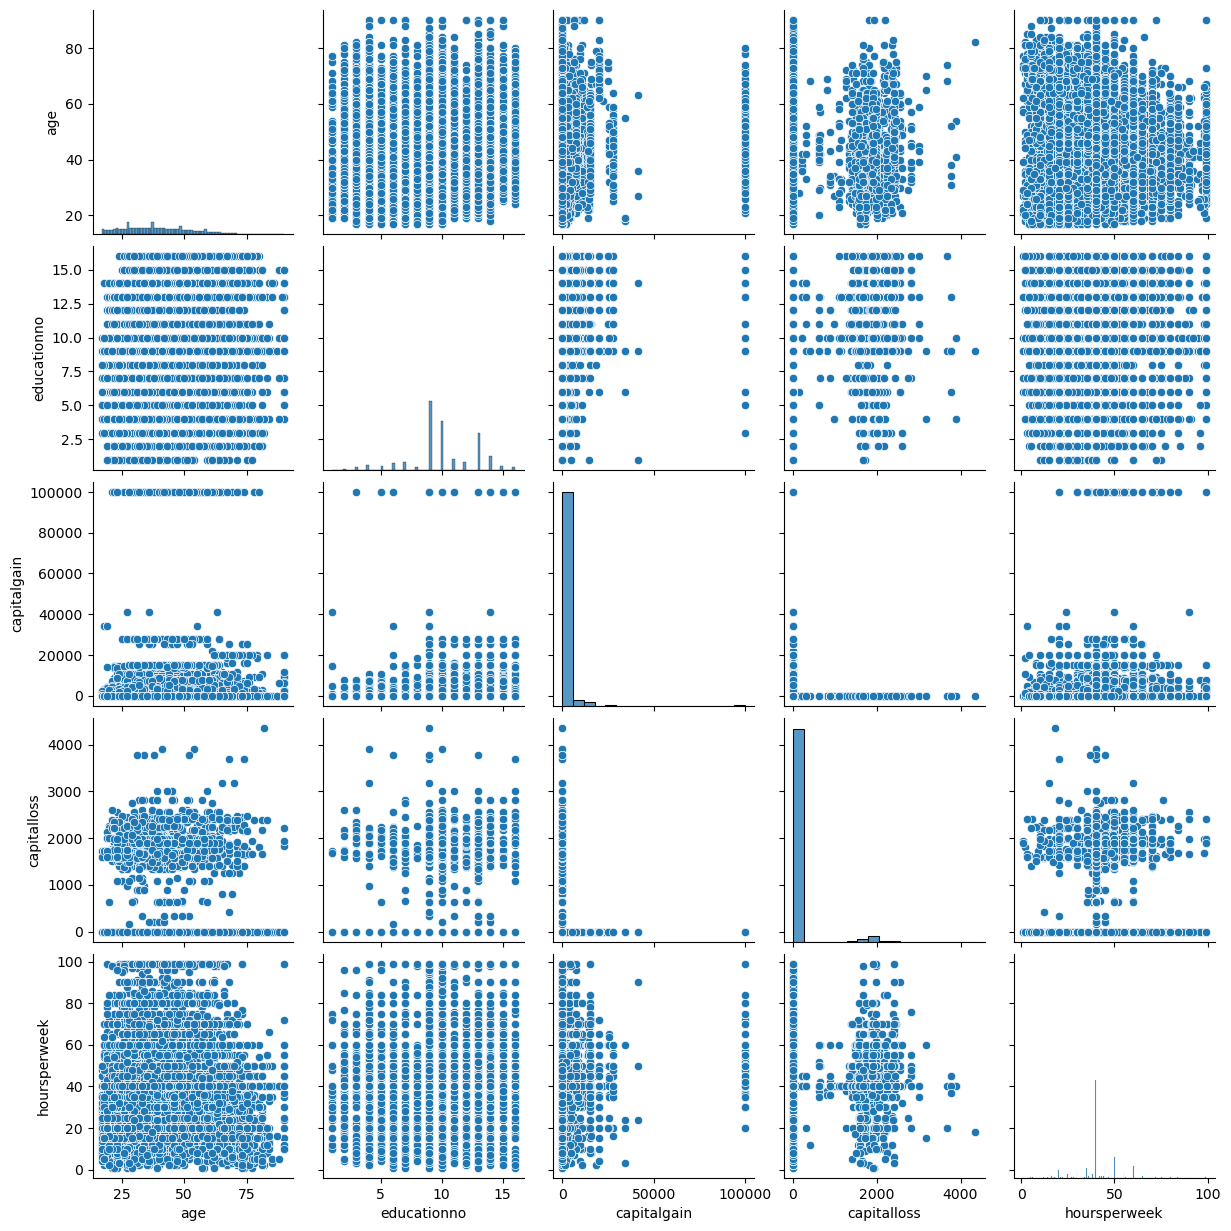

In [12]:
sns.pairplot(df)
plt.show()

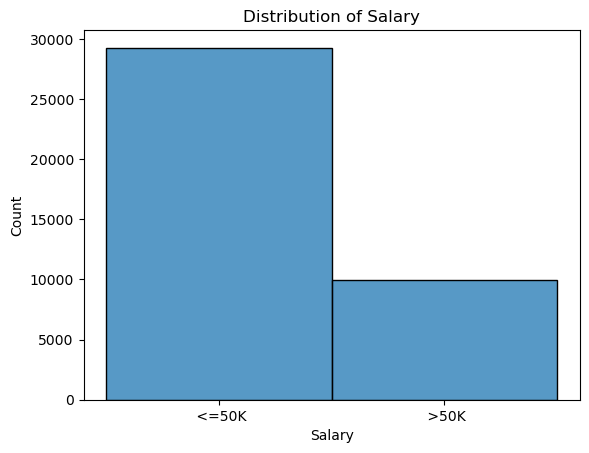

In [13]:
sns.histplot(df['Salary'])
plt.title('Distribution of Salary')
plt.show()

In [14]:
corr = df.corr()
corr

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.030211,0.075495,0.049876,0.066927
educationno,0.030211,1.000000,0.129552,0.082594,0.136030
capitalgain,0.075495,0.129552,1.000000,-0.036791,0.082977
capitalloss,0.049876,0.082594,-0.036791,1.000000,0.050638
hoursperweek,0.066927,0.136030,0.082977,0.050638,1.000000


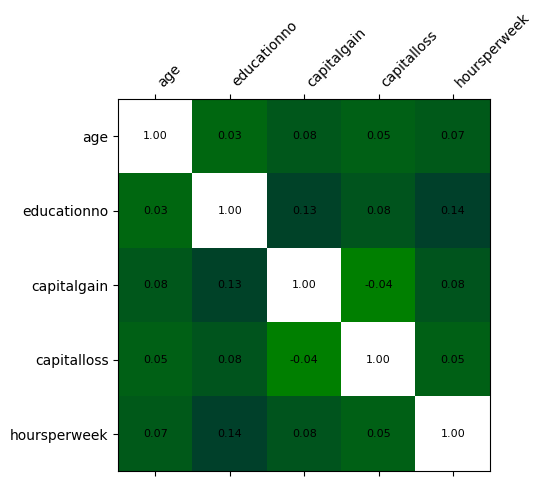

In [15]:
plt.matshow(corr, cmap='ocean')
column_names = corr.columns

for (i, j), z in np.ndenumerate(corr):
    plt.text(j, i, "{:0.2f}".format(z), ha="center", va="center",
             fontdict={'fontsize': 8})

plt.xticks(range(len(column_names)), column_names, rotation=45, ha='left')
plt.yticks(range(len(column_names)), column_names)

plt.show()


#### Univariate Plots

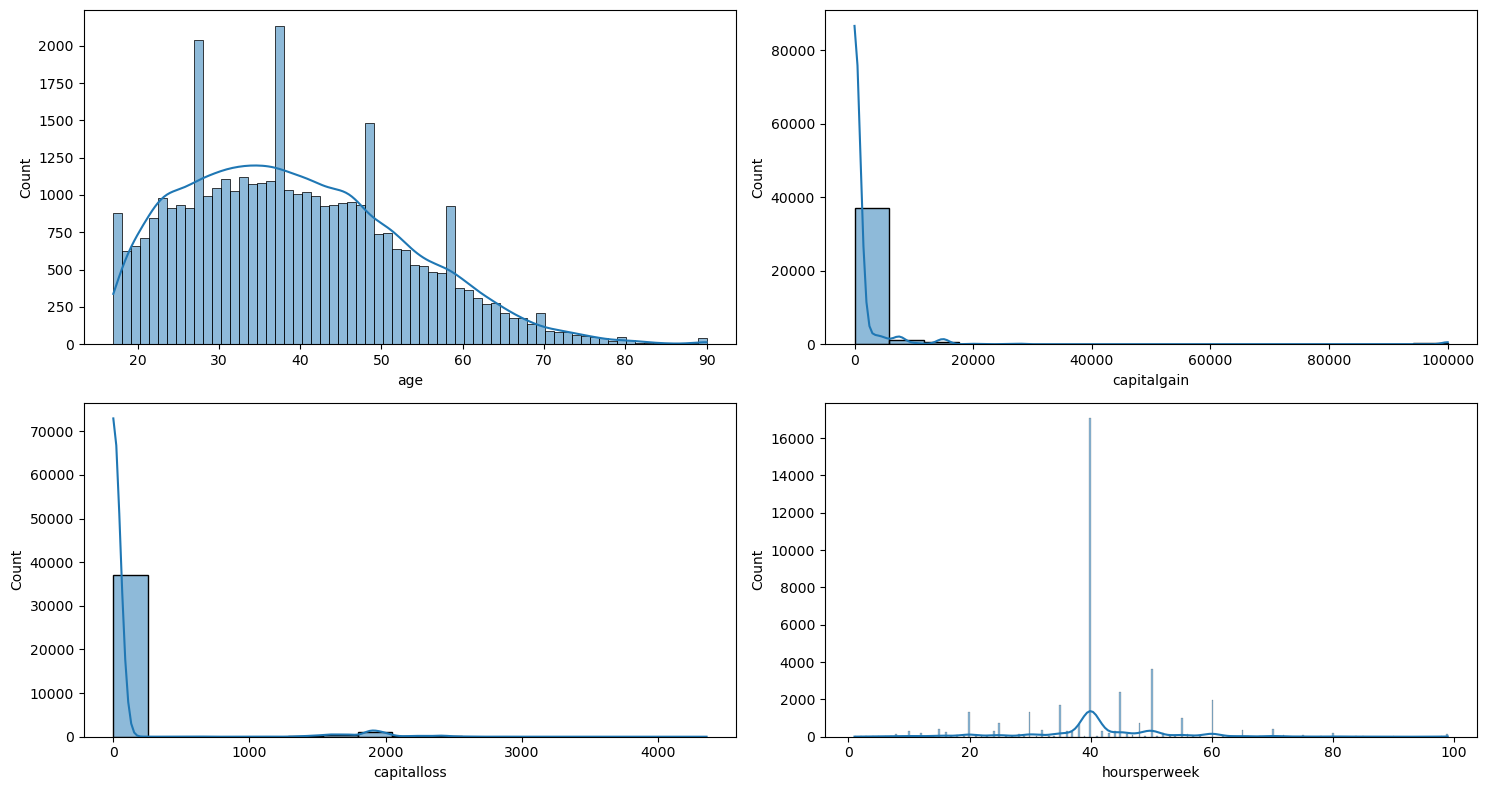

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
sns.histplot(df['age'], kde=True, ax=axes[0, 0])
sns.histplot(df['capitalgain'], kde=True, ax=axes[0, 1])
sns.histplot(df['capitalloss'], kde=True, ax=axes[1, 0])
sns.histplot(df['hoursperweek'], kde=True, ax=axes[1, 1])
plt.tight_layout()
plt.show()

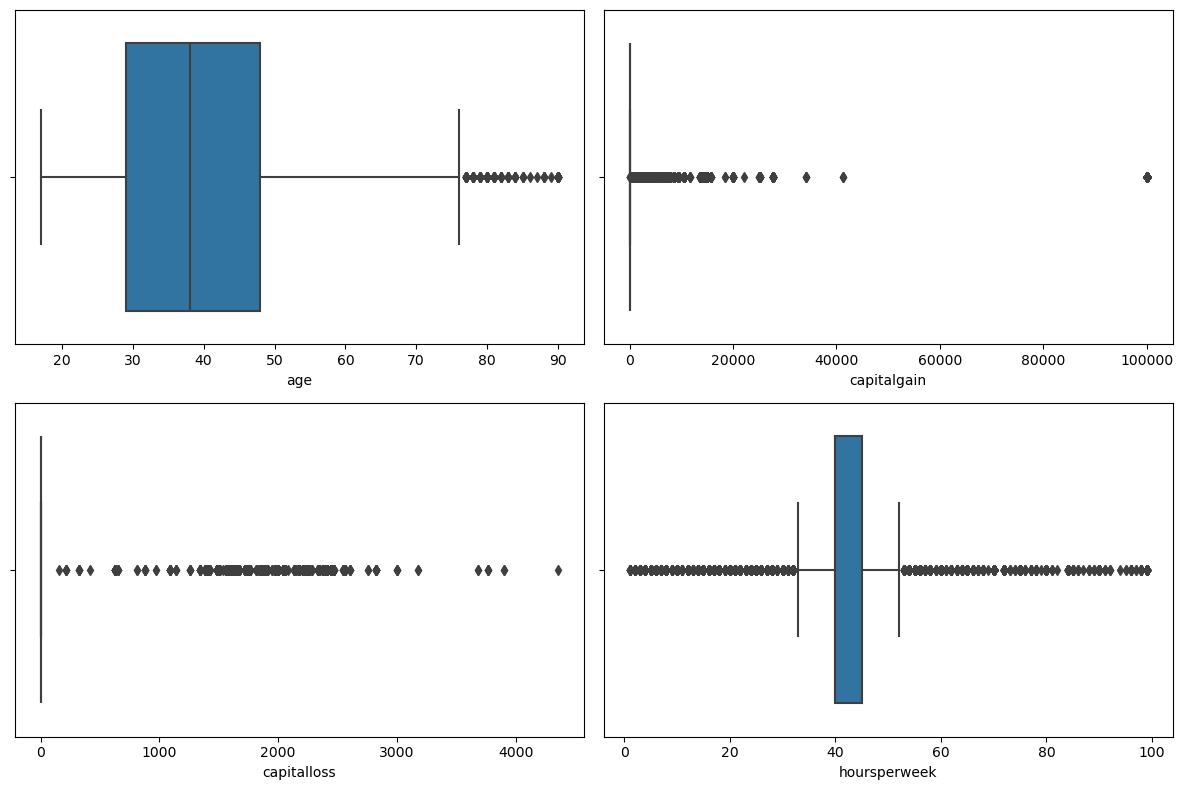

In [17]:
# Detect outliers using boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x='age', data=df, ax=axes[0, 0])
sns.boxplot(x='capitalgain', data=df, ax=axes[0, 1])
sns.boxplot(x='capitalloss', data=df, ax=axes[1, 0])
sns.boxplot(x='hoursperweek', data=df, ax=axes[1, 1])
plt.tight_layout()
plt.show()

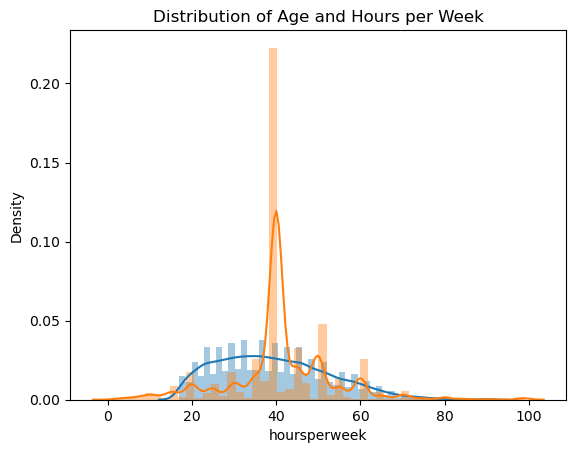

In [18]:
# Visualize the distribution of age and hoursperweek
sns.distplot(df['age'], kde=True, label='Age')
sns.distplot(df['hoursperweek'], kde=True, label='Hours per Week')
plt.title('Distribution of Age and Hours per Week')
plt.show()

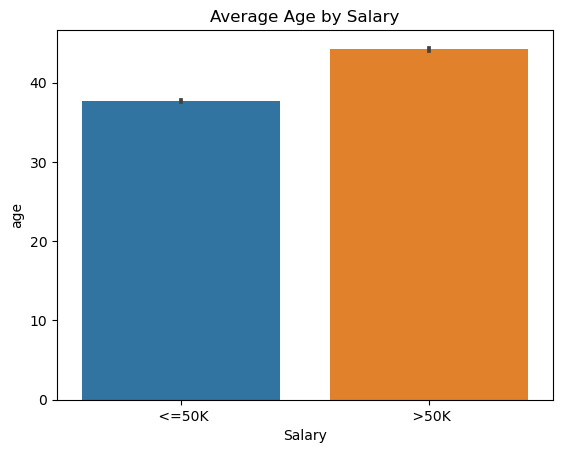

In [19]:
# Barplot for age and salary
sns.barplot(x='Salary', y='age', data=df)
plt.title('Average Age by Salary')
plt.show()

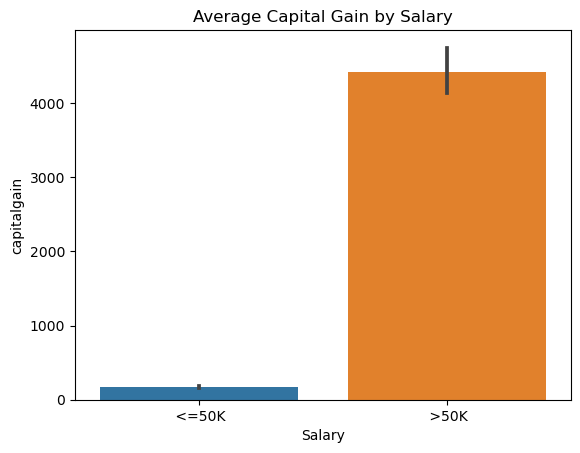

In [20]:
# Barplot for capitalgain and salary
sns.barplot(x='Salary', y='capitalgain', data=df)
plt.title('Average Capital Gain by Salary')
plt.show()

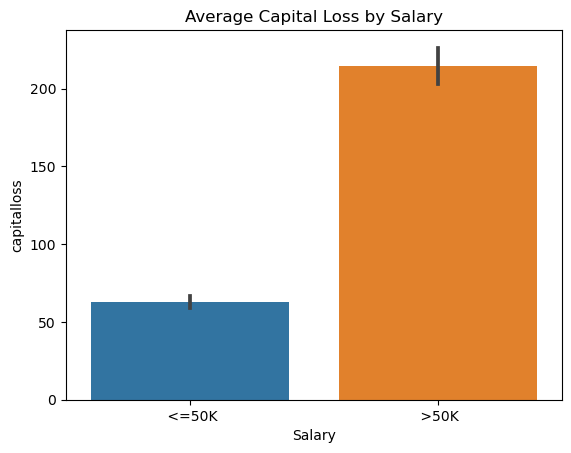

In [21]:
# Barplot for capitalloss and salary
sns.barplot(x='Salary', y='capitalloss', data=df)
plt.title('Average Capital Loss by Salary')
plt.show()

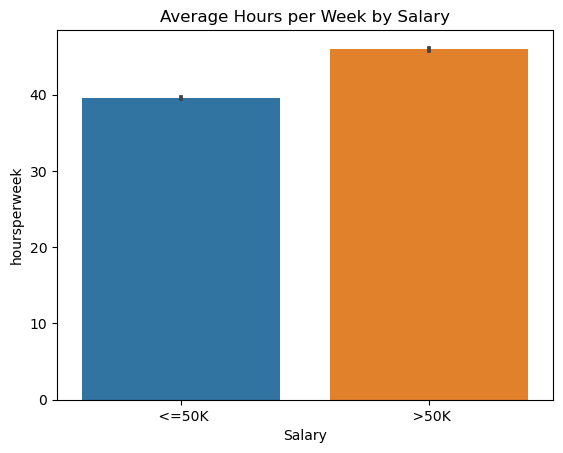

In [22]:
# Barplot for hoursperweek and salary
sns.barplot(x='Salary', y='hoursperweek', data=df)
plt.title('Average Hours per Week by Salary')
plt.show()

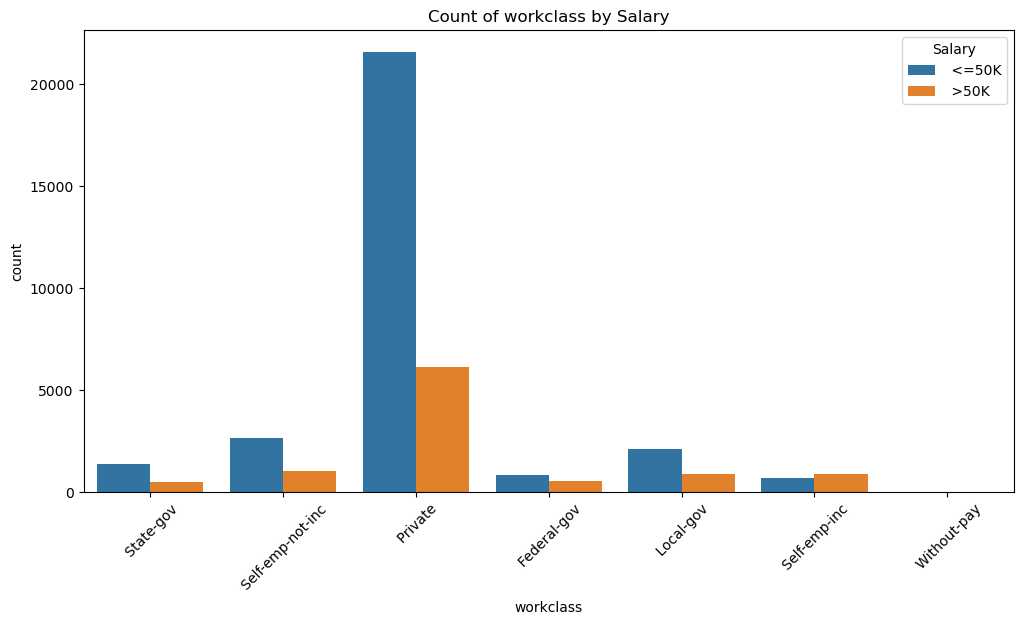

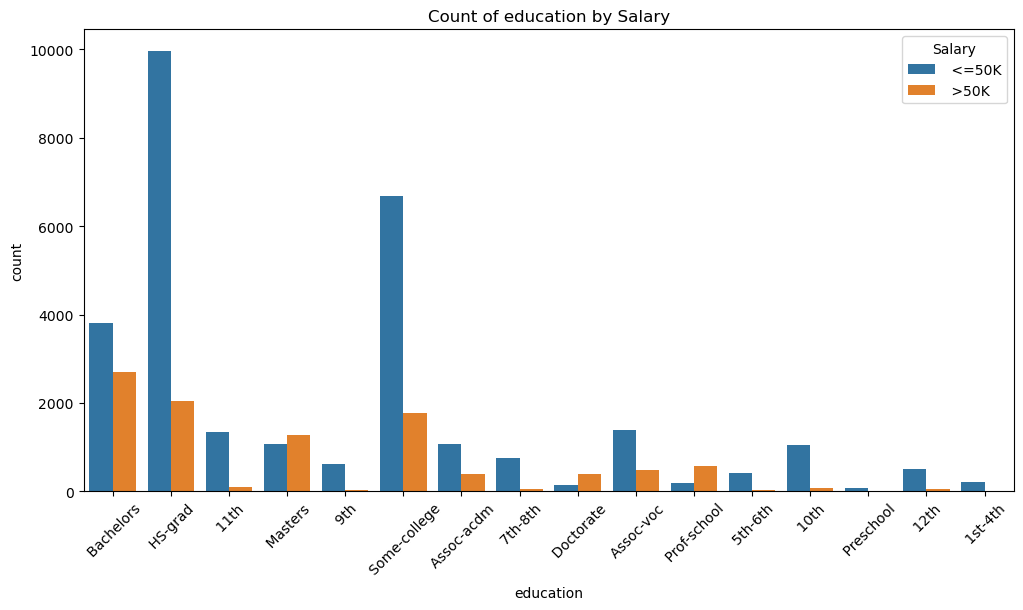

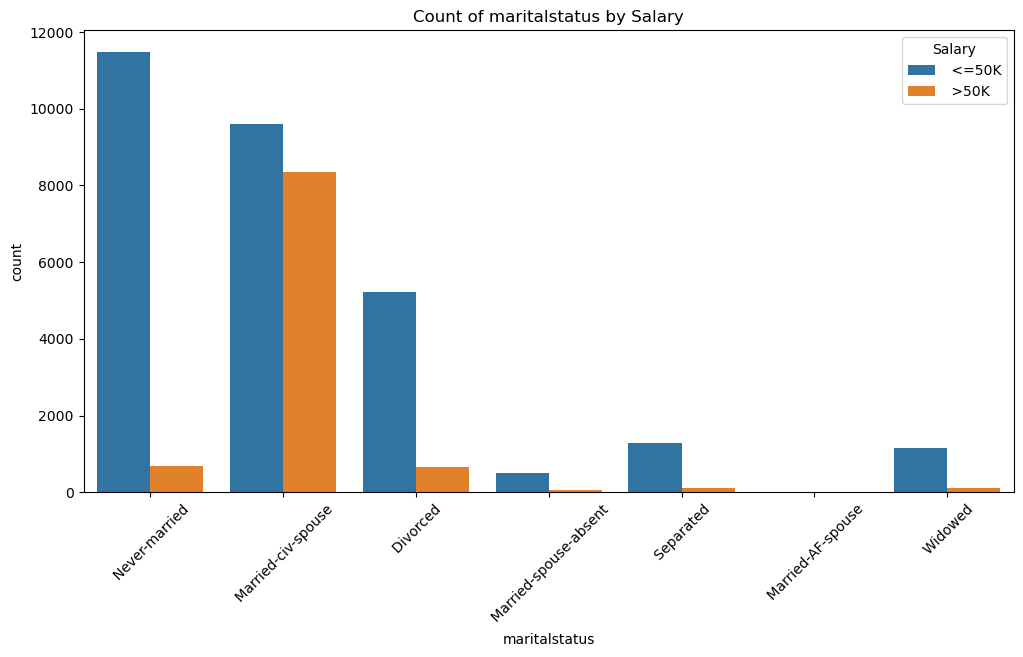

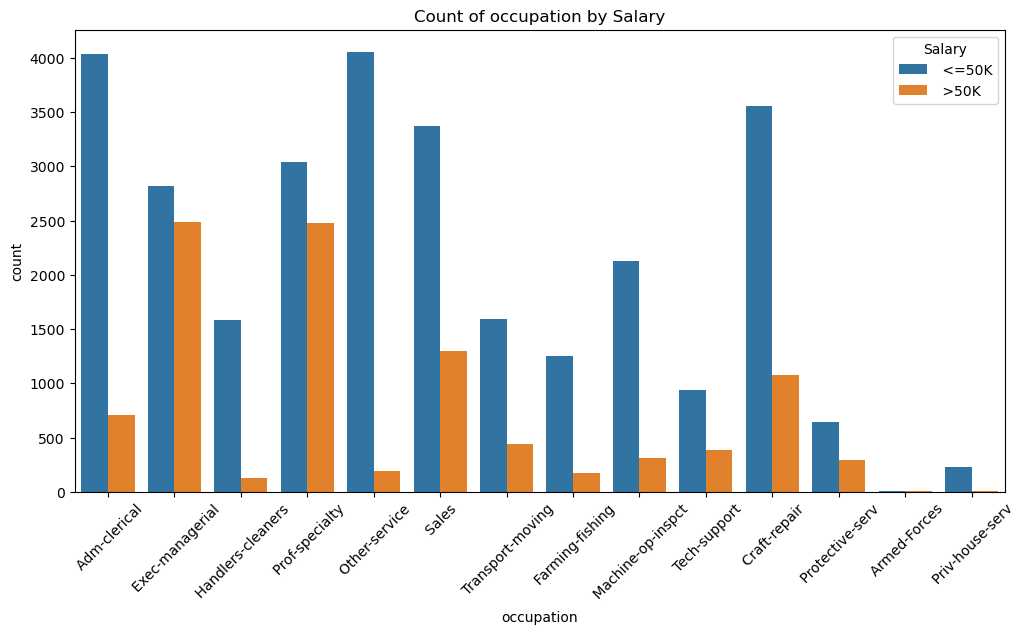

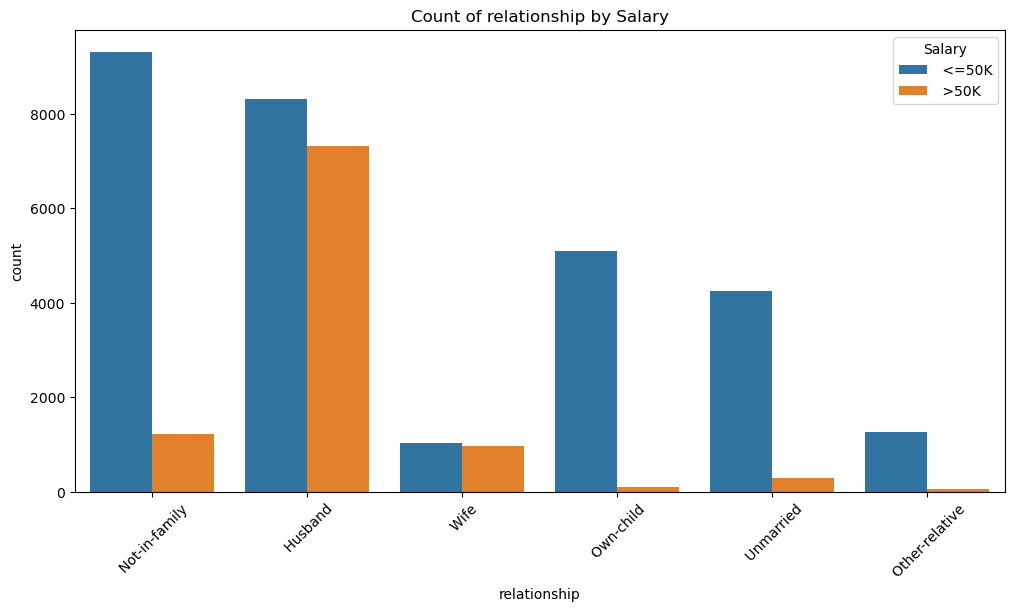

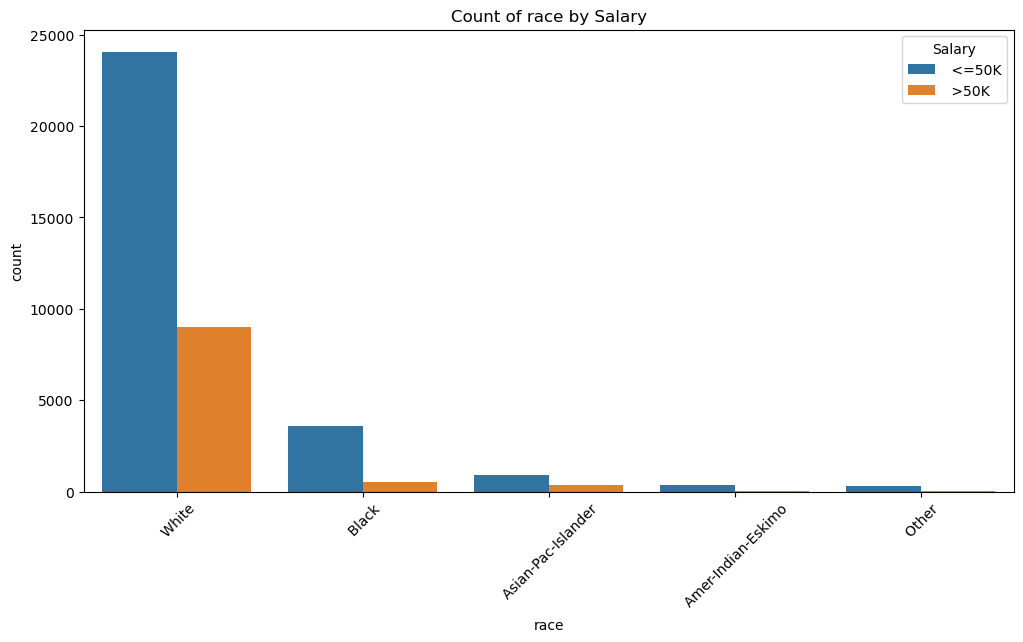

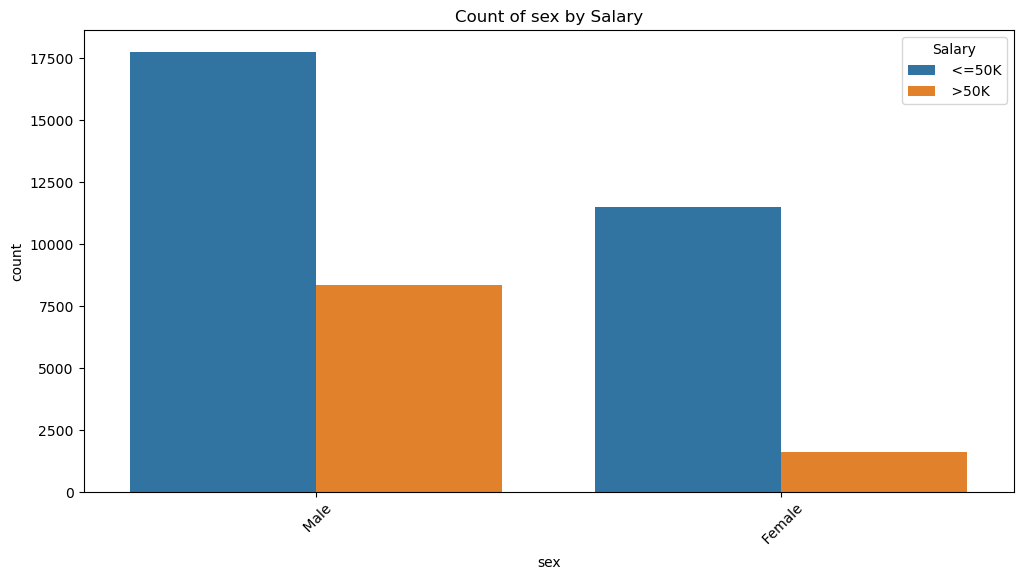

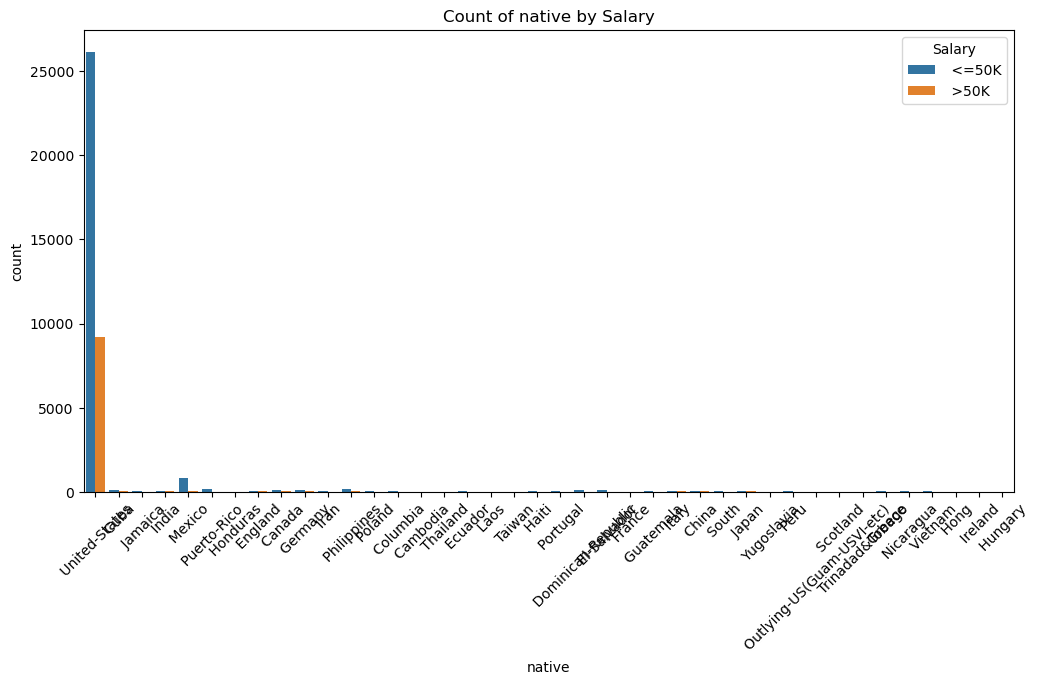

In [23]:
# Barplot for categorical variables
cat_cols = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']

for col in cat_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue='Salary', data=df)
    plt.title(f'Count of {col} by Salary')
    plt.xticks(rotation=45)
    plt.show()

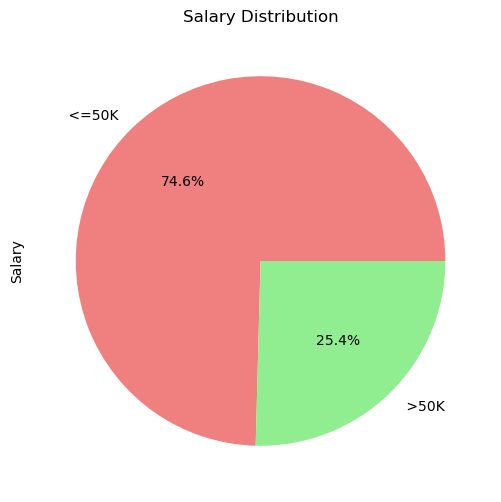

In [24]:
# Pie chart for Salary distribution
plt.figure(figsize=(6, 6))
df['Salary'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Salary Distribution')
plt.show()

#### Bivariate analysis

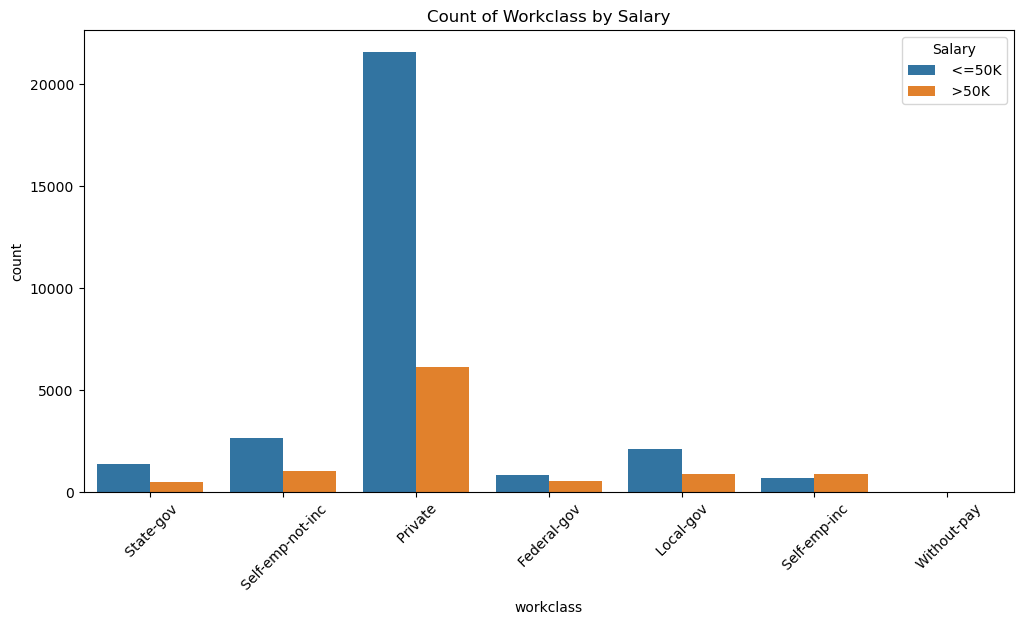

In [25]:
# Plot for workclass and salary using value counts
plt.figure(figsize=(12, 6))
sns.countplot(x='workclass', hue='Salary', data=df)
plt.title('Count of Workclass by Salary')
plt.xticks(rotation=45)
plt.show()

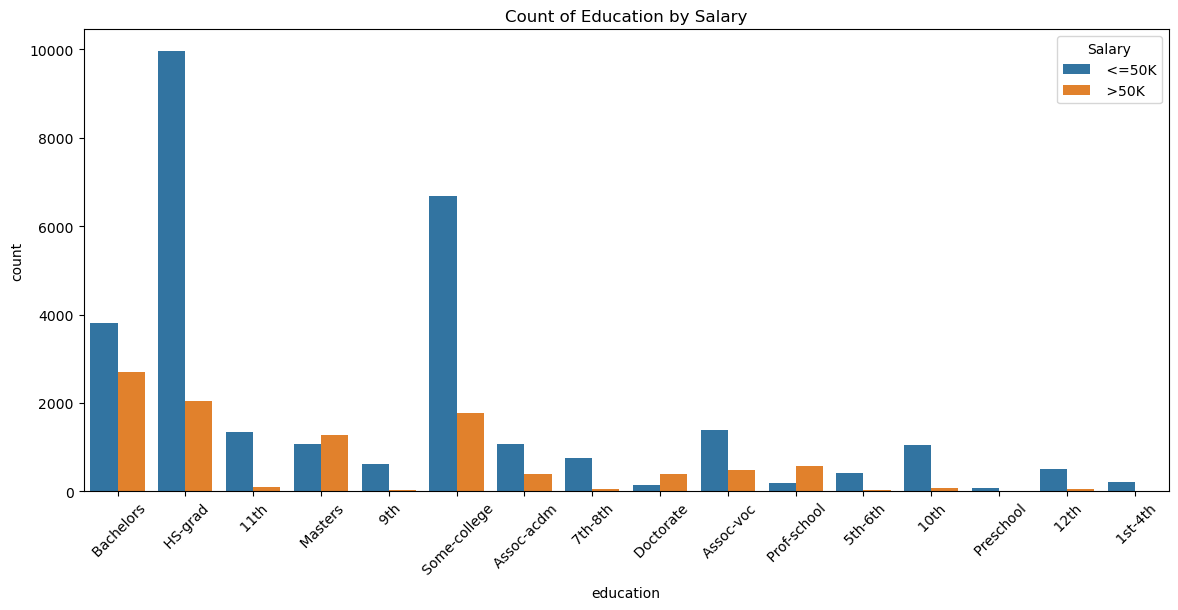

In [26]:
# Plot for education and salary
plt.figure(figsize=(14, 6))
sns.countplot(x='education', hue='Salary', data=df)
plt.title('Count of Education by Salary')
plt.xticks(rotation=45)
plt.show()

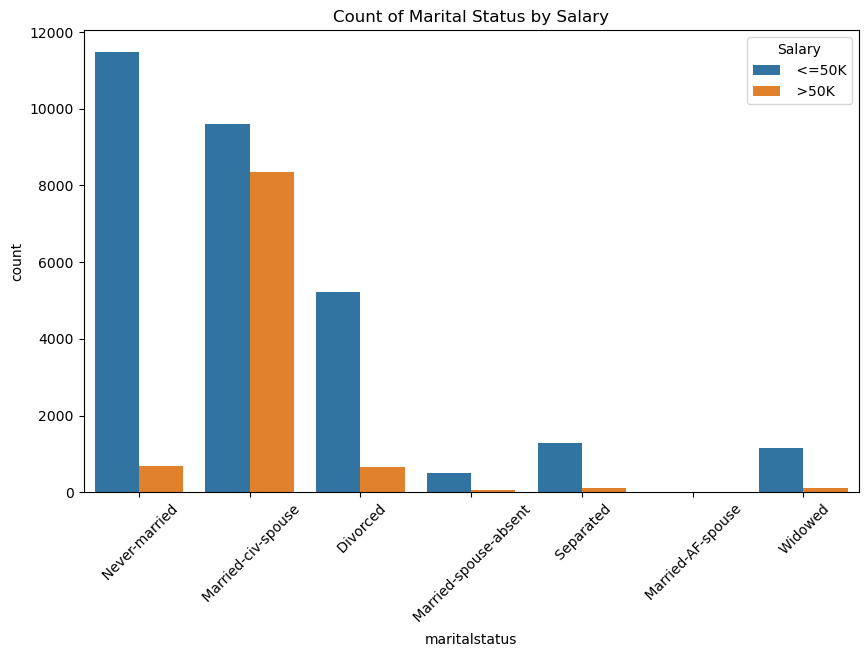

In [27]:
# Plot for marital status and salary
plt.figure(figsize=(10, 6))
sns.countplot(x='maritalstatus', hue='Salary', data=df)
plt.title('Count of Marital Status by Salary')
plt.xticks(rotation=45)
plt.show()

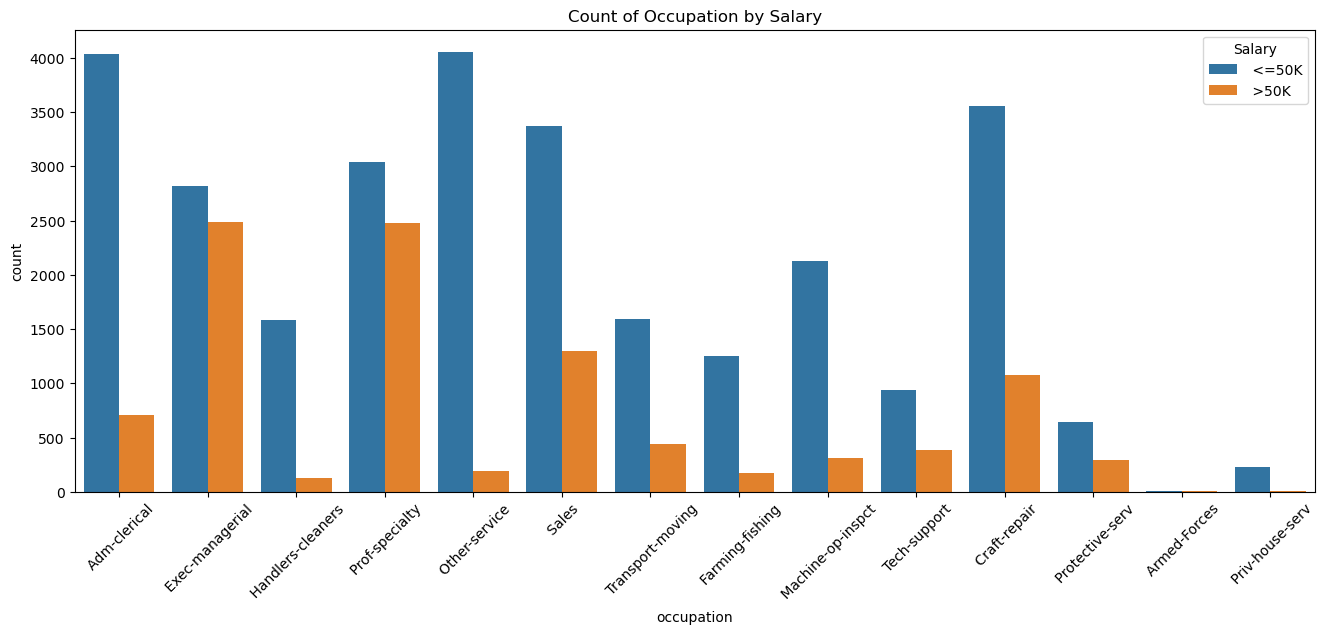

In [28]:
# Plot for occupation and salary
plt.figure(figsize=(16, 6))
sns.countplot(x='occupation', hue='Salary', data=df)
plt.title('Count of Occupation by Salary')
plt.xticks(rotation=45)
plt.show()

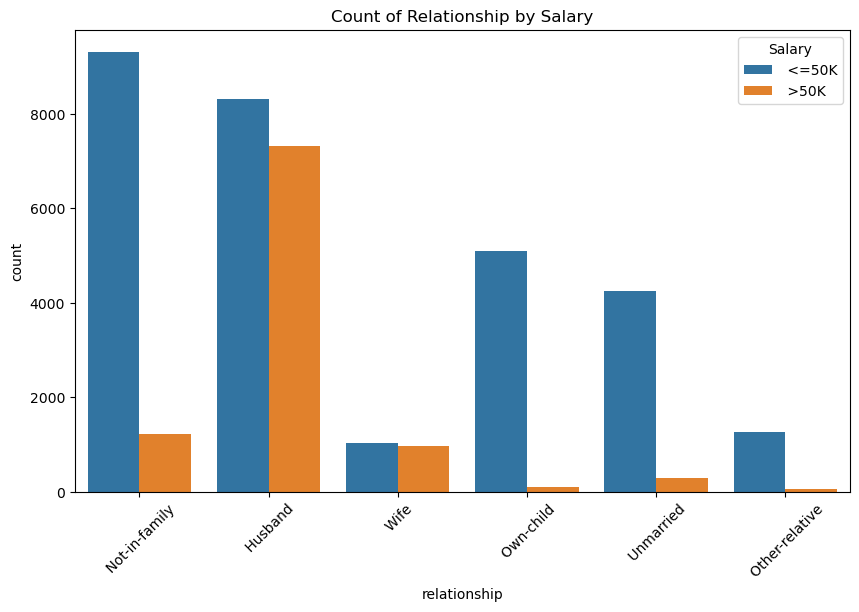

In [29]:
# Plot for relationship and salary
plt.figure(figsize=(10, 6))
sns.countplot(x='relationship', hue='Salary', data=df)
plt.title('Count of Relationship by Salary')
plt.xticks(rotation=45)
plt.show()

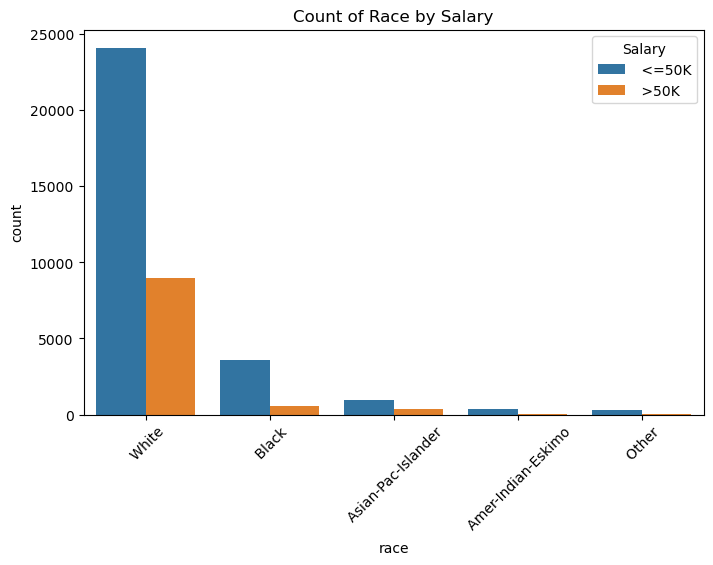

In [30]:
# Plot for race and salary
plt.figure(figsize=(8, 5))
sns.countplot(x='race', hue='Salary', data=df)
plt.title('Count of Race by Salary')
plt.xticks(rotation=45)
plt.show()

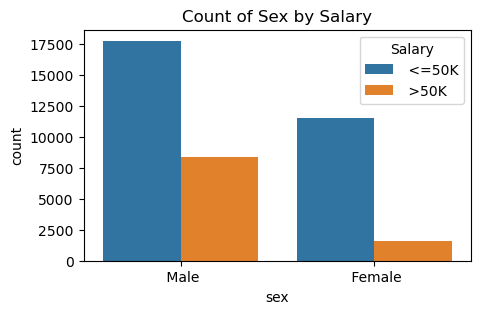

In [31]:
# Plot for sex and salary
plt.figure(figsize=(5, 3))
sns.countplot(x='sex', hue='Salary', data=df)
plt.title('Count of Sex by Salary')
plt.show()

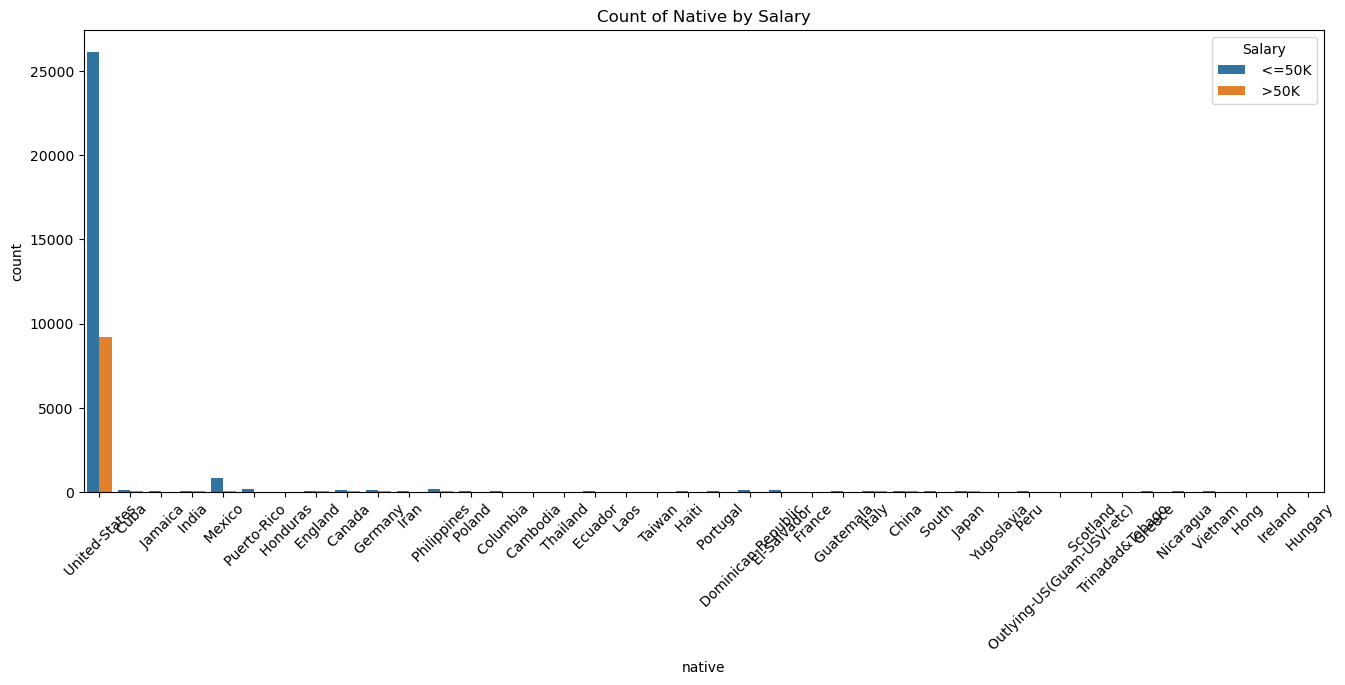

In [32]:
# Plot for native and salary
plt.figure(figsize=(16, 6))
sns.countplot(x='native', hue='Salary', data=df)
plt.title('Count of Native by Salary')
plt.xticks(rotation=45)
plt.show()

In [33]:
age_bins = [17, 30, 45, 60, 90]
age_labels = ['18-30', '31-45', '46-60', '61-90']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

ct_age_salary = pd.crosstab(df['age_group'], df['Salary'], margins=True, margins_name='Total')
print(ct_age_salary)

Salary      <=50K   >50K  Total
age_group                      
18-30        9829    671  10500
31-45       10930   4659  15589
46-60        6166   3841  10007
61-90        2307    792   3099
Total       29232   9963  39195


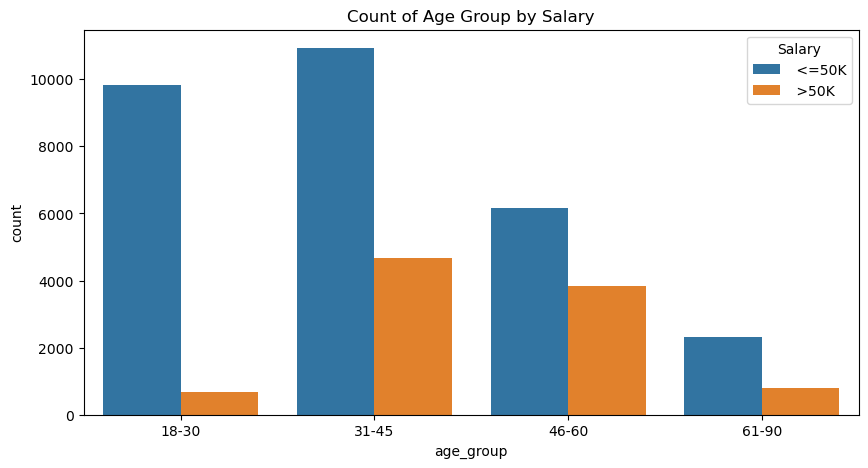

In [34]:
plt.figure(figsize=(10, 5))
sns.countplot(x='age_group', hue='Salary', data=df)
plt.title('Count of Age Group by Salary')
plt.show()

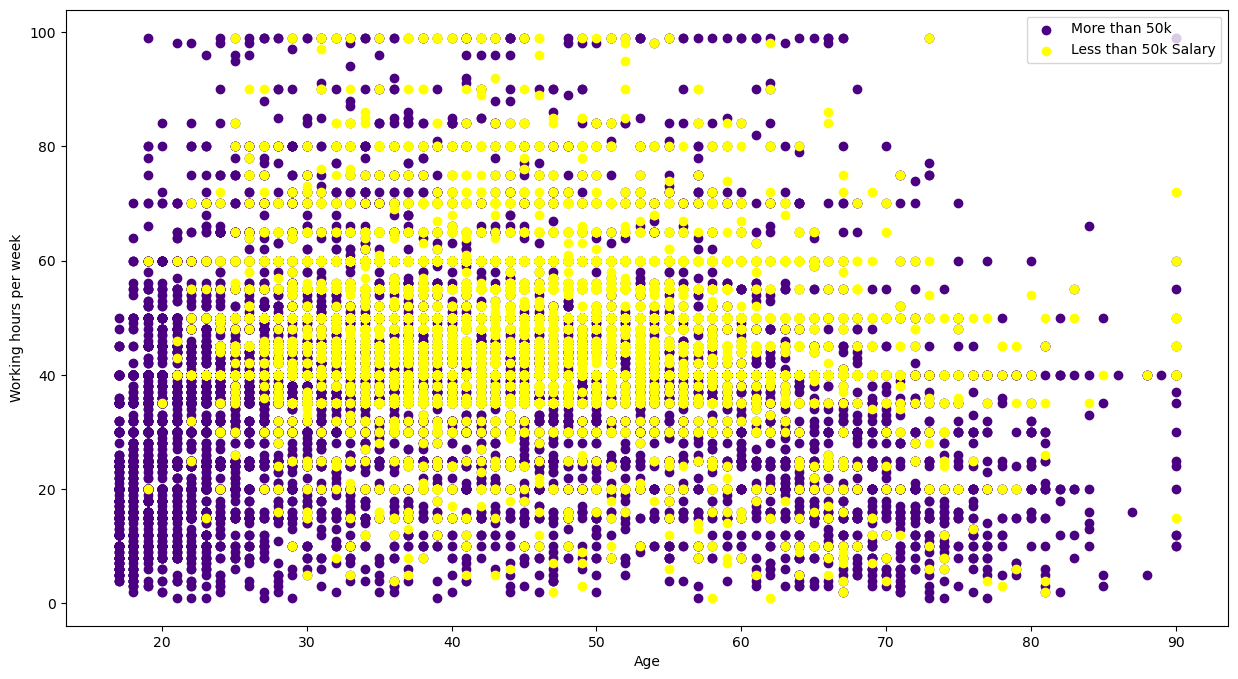

In [35]:
plt.figure(figsize=(15, 8))
plt.scatter(x=df.age[df.Salary== ' <=50K'], y=df.hoursperweek[(df.Salary== ' <=50K')], color='indigo')
plt.scatter(x=df.age[df.Salary== ' >50K'], y=df.hoursperweek[(df.Salary== ' >50K')], color='yellow')
plt.legend(["More than 50k", "Less than 50k Salary"])
plt.xlabel("Age")
plt.ylabel("Working hours per week")
plt.show()

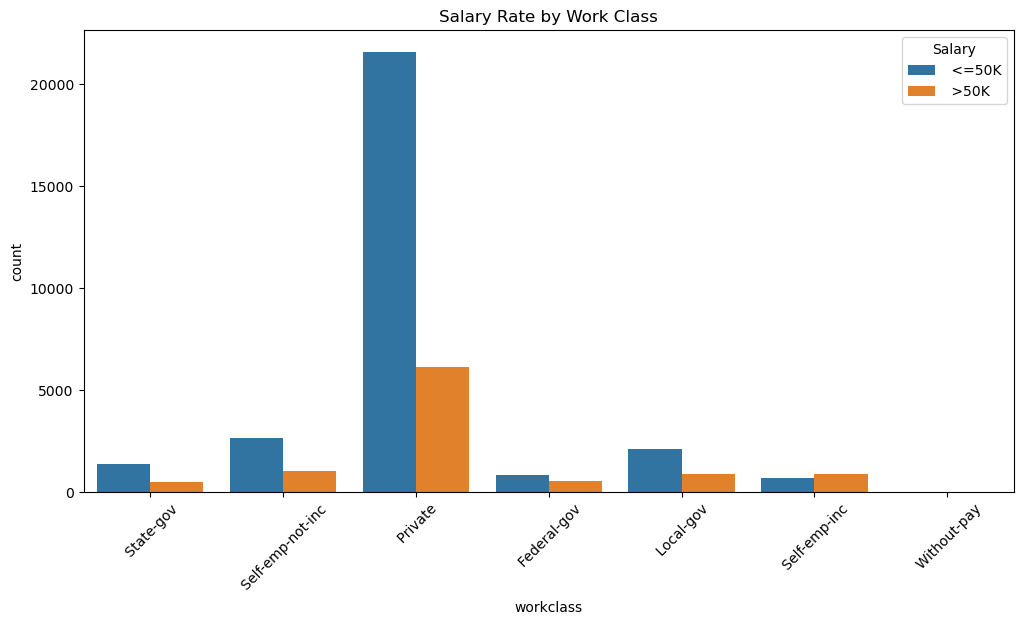

In [36]:
# Visualization of salary rate by work class
plt.figure(figsize=(12, 6))
sns.countplot(x='workclass', hue='Salary', data=df)
plt.title('Salary Rate by Work Class')
plt.xticks(rotation=45)
plt.show()

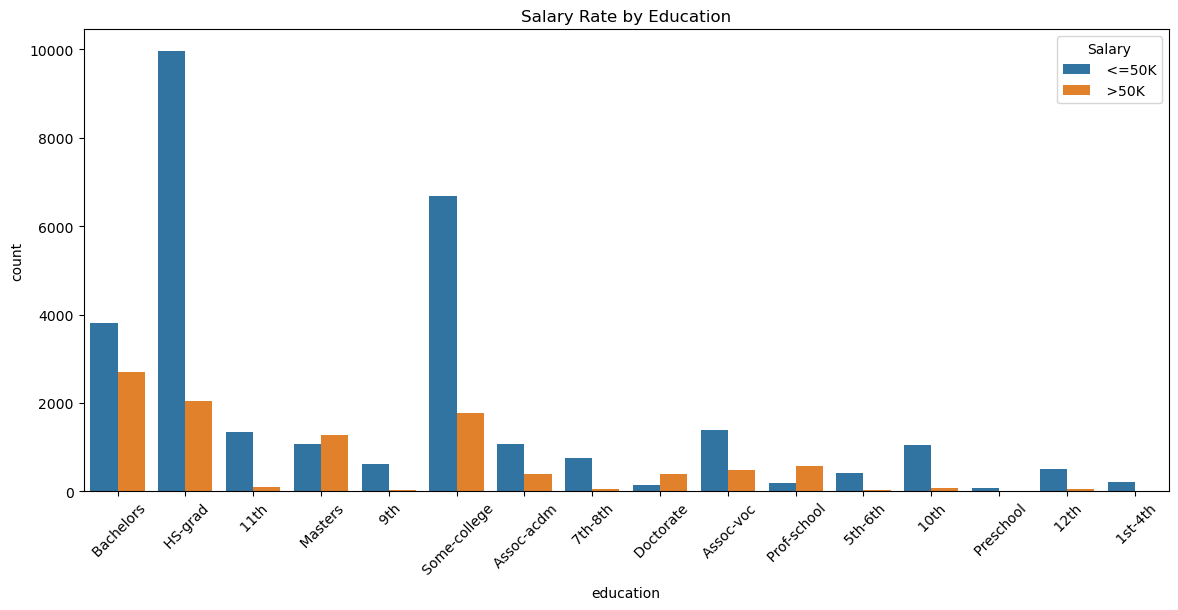

In [37]:
# Visualization of salary rate by education
plt.figure(figsize=(14, 6))
sns.countplot(x='education', hue='Salary', data=df)
plt.title('Salary Rate by Education')
plt.xticks(rotation=45)
plt.show()

In [38]:
# Label Encoding for categorical variables
le = LabelEncoder()

In [39]:
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [40]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,age_group
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K,31-45
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K,46-60
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K,31-45
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K,46-60
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K,18-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45215,48,1,12,14,0,7,1,4,1,0,0,40,37,<=50K,46-60
45216,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K,31-45
45217,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K,31-45
45219,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K,31-45


In [41]:
# Split the data
X = df.drop(['Salary', 'age_group'], axis=1)
y = df['Salary']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
# MultinomialNB
multinomial_clf = MultinomialNB()
multinomial_clf.fit(X_train, y_train)
multinomial_pred = multinomial_clf.predict(X_test)

In [44]:
print("MultinomialNB Confusion Matrix:")
print(confusion_matrix(y_test, multinomial_pred))
print("\nMultinomialNB Classification Report:")
print(classification_report(y_test, multinomial_pred))
print("\nMultinomialNB Accuracy:", accuracy_score(y_test, multinomial_pred))

MultinomialNB Confusion Matrix:
[[5549  304]
 [1500  495]]

MultinomialNB Classification Report:
              precision    recall  f1-score   support

       <=50K       0.79      0.95      0.86      5853
        >50K       0.62      0.25      0.35      1995

    accuracy                           0.77      7848
   macro avg       0.70      0.60      0.61      7848
weighted avg       0.74      0.77      0.73      7848


MultinomialNB Accuracy: 0.7701325178389399


In [45]:
# GaussianNB
gaussian_clf = GaussianNB()
gaussian_clf.fit(X_train, y_train)
gaussian_pred = gaussian_clf.predict(X_test)

In [46]:
print("\nGaussianNB Confusion Matrix:")
print(confusion_matrix(y_test, gaussian_pred))
print("\nGaussianNB Classification Report:")
print(classification_report(y_test, gaussian_pred))
print("\nGaussianNB Accuracy:", accuracy_score(y_test, gaussian_pred))


GaussianNB Confusion Matrix:
[[5497  356]
 [1283  712]]

GaussianNB Classification Report:
              precision    recall  f1-score   support

       <=50K       0.81      0.94      0.87      5853
        >50K       0.67      0.36      0.46      1995

    accuracy                           0.79      7848
   macro avg       0.74      0.65      0.67      7848
weighted avg       0.77      0.79      0.77      7848


GaussianNB Accuracy: 0.7911569826707442


In [47]:
# CategoricalNB
categorical_clf = CategoricalNB()
categorical_clf.fit(X_train, y_train)
categorical_pred = categorical_clf.predict(X_test)

In [48]:
print("\nCategoricalNB Confusion Matrix:")
print(confusion_matrix(y_test, categorical_pred))
print("\nCategoricalNB Classification Report:")
print(classification_report(y_test, categorical_pred))
print("\nCategoricalNB Accuracy:", accuracy_score(y_test, categorical_pred))


CategoricalNB Confusion Matrix:
[[5367  486]
 [ 669 1326]]

CategoricalNB Classification Report:
              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      5853
        >50K       0.73      0.66      0.70      1995

    accuracy                           0.85      7848
   macro avg       0.81      0.79      0.80      7848
weighted avg       0.85      0.85      0.85      7848


CategoricalNB Accuracy: 0.85282874617737


In [49]:
results_df = pd.DataFrame({
    'Model': ['MultinomialNB', 'GaussianNB', 'CategoricalNB'],
    'Accuracy': [accuracy_score(y_test, multinomial_pred),
                 accuracy_score(y_test, gaussian_pred),
                 accuracy_score(y_test, categorical_pred)]
})

In [50]:
results_df

,Model,Accuracy
0,MultinomialNB,0.770133
1,GaussianNB,0.791157
2,CategoricalNB,0.852829
